# Classification modelling

## Creating train and test data

In [74]:
# Essential for modelling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Other packages
from ucimlrepo import fetch_ucirepo
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fetch = fetch_ucirepo(id=545)
X = fetch.data.features
y = fetch.data.targets
rice = pd.concat([X, y], axis=1)

# Encoding Class (Cammeo and Osmancik into 0 and 1)
y = y.copy()
label_encoder = LabelEncoder()
y['Class'] = label_encoder.fit_transform(y['Class'])

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2023)

# Normalize the data to use when needed
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Uncomment to change
X_train = X_train_norm
X_test = X_test_norm

## K-Nearest Neighbors (KNN)

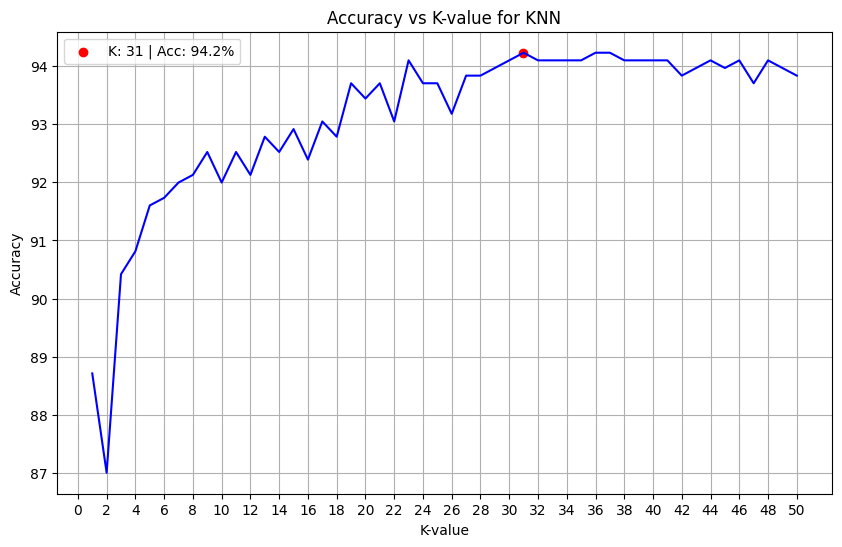

Accuracy: 94.2%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.91      0.95      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[292  16]
 [ 28 426]]


In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.values.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.values.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.values.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.values.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

## Decision Tree (DT)

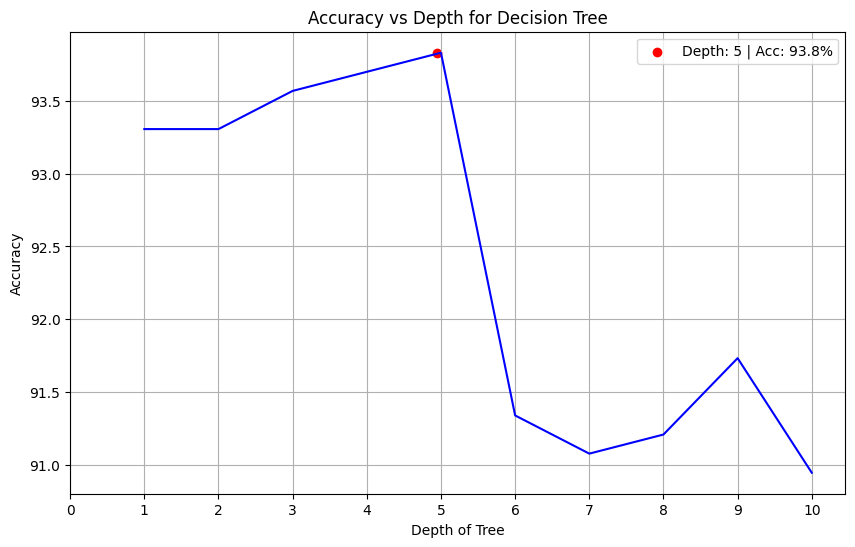

Accuracy: 93.8%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.93      0.92      0.92       308
    Osmancik       0.94      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.93      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[282  26]
 [ 21 433]]


In [19]:
from sklearn.tree import DecisionTreeClassifier

DT_results = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.values.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.values.ravel(), DT_pred)
DT_cr = classification_report(y_test.values.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.values.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

## Random Forest (RF)

Best combination
Depth          5.000000
Estimators    47.000000
Accuracy      94.225722
Name: 72, dtype: float64


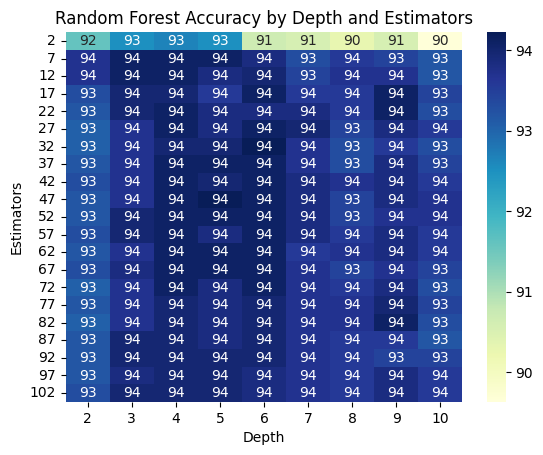

Accuracy: 94.2%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.92      0.94      0.93       308
    Osmancik       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[290  18]
 [ 26 428]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.values.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.values.ravel(), RF_pred)
RF_cr = classification_report(y_test.values.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.values.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)

## Support Vector Machines (SVM)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid

# Grid search for the best parameters
SVM_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
SVM_grid = GridSearchCV(SVC(), SVM_param_grid, refit = True, verbose = 2)
SVM_grid.fit(X_train, y_train.values.ravel())
print(SVM_grid.best_estimator_)

# Creating the model using the best parameters from the Grid Search
SVM_pred = SVM_grid.predict(X_test)
SVM_accuracy = accuracy_score(y_test.values.ravel(), SVM_pred)
SVM_cr = classification_report(y_test.values.ravel(), SVM_pred)
SVM_cm = confusion_matrix(y_test.values.ravel(), SVM_pred)

# Printing the metrics
print("Accuracy:", f"{SVM_accuracy * 100:.1f}%\n")
print("Classification Report\n", SVM_cr)
print("Confusion Matrix\n", SVM_cm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

## Naive Bayes (NB)

In [32]:
from sklearn.naive_bayes import GaussianNB

# Unlike the other models, Naive Bayes has no parameters that need tuning
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.values.ravel())
NB_pred = NB_model.predict(X_test)
NB_accuracy = accuracy_score(y_test.values.ravel(), NB_pred)
NB_cr = classification_report(y_test.values.ravel(), NB_pred)
NB_cm = confusion_matrix(y_test.values.ravel(), NB_pred)

# Printing the metrics
print("Accuracy:", f"{NB_accuracy * 100:.1f}%\n")
print("Classification Report\n", NB_cr)
print("Confusion Matrix\n", NB_cm)

Accuracy: 92.0%

Classification Report
               precision    recall  f1-score   support

      Cammeo       0.89      0.92      0.90       308
    Osmancik       0.94      0.92      0.93       454

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762

Confusion Matrix
 [[283  25]
 [ 36 418]]


## Logistic Regression (LR)

In the context of Logistic Regression or regularized models in general, 'l1' and 'l2' refer to different types of regularization, specifically the penalty terms applied to the model's cost function.

* **L1 Regularization ('l1'):** Also known as Lasso regularization, it adds a penalty term proportional to the absolute value of the coefficients' magnitudes. L1 regularization can drive some coefficients to exactly zero, effectively performing feature selection by eliminating less important features.

* **L2 Regularization ('l2'):** Known as Ridge regularization, it adds a penalty term proportional to the square of the coefficients' magnitudes. L2 regularization penalizes large coefficients and shrinks them towards zero but typically doesn’t force coefficients to exactly zero, hence rarely eliminates features completely.

In Logistic Regression, setting the penalty hyperparameter to 'l1' or 'l2' determines which type of regularization is applied to the model. This regularization helps prevent overfitting by penalizing large coefficients and encourages the model to generalize better to unseen data.

The choice between 'l1' and 'l2' regularization depends on the specific problem and the nature of the features. 'l1' regularization is often favored when there's a suspicion that only a few features are truly important, as it can lead to a sparse solution by setting less important feature coefficients to zero. 'l2' regularization, on the other hand, usually shrinks all coefficients uniformly and can be more appropriate when all features are potentially relevant.

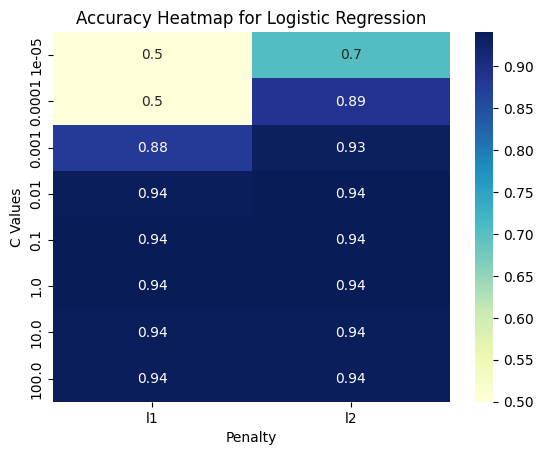

Best hyperparameters
C               0.01
Solver          saga
Penalty           l1
Accuracy    0.940945
Name: 16, dtype: object

Accuracy: 94.1%

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       308
           1       0.96      0.94      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[292  16]
 [ 29 425]]


In [78]:
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define ranges for hyperparameters
penalty_values = ['l1', 'l2']
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]  # List of C values to test
solver_values = ['liblinear', 'saga', 'sag']  # Different solvers supporting both 'l1' and 'l2' penalties

# Perform grid search
LR_results = []

for params in ParameterGrid({'penalty': penalty_values, 'C': C_values, 'solver': solver_values}):
    if (params['solver'] in ['lbfgs', 'sag']) and params['penalty'] == 'l1':
        continue  # Skip 'lbfgs' and 'sag' solvers with 'l1' penalty
    clf_lr = LogisticRegression(**params)
    clf_lr.fit(X_train, y_train.values.ravel())
    yhat = clf_lr.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), yhat)
    LR_results.append({'Penalty': params['penalty'], 'C': params['C'], 'Solver': params['solver'], 'Accuracy': accuracy})

LR_results_df = pd.DataFrame(LR_results)
pivot_table = LR_results_df.pivot_table(index='C', columns='Penalty', values='Accuracy')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Accuracy Heatmap for Logistic Regression')
plt.xlabel('Penalty')
plt.ylabel('C Values')
plt.show()

# Find the row index with the maximum accuracy
best_row_index = LR_results_df['Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best result
best_hyperparameters = LR_results_df.loc[best_row_index, ['C', 'Solver', 'Penalty', 'Accuracy']]
best_C = best_hyperparameters['C']
best_solver = best_hyperparameters['Solver']
best_penalty = best_hyperparameters['Penalty']

print("Best hyperparameters")
print(best_hyperparameters)

# Fitting the model with the best hyperparameters
LR_model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
LR_model.fit(X_train, y_train.values.ravel())
LR_pred = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test.values.ravel(), LR_pred)
LR_cr = classification_report(y_test.values.ravel(), LR_pred)
LR_cm = confusion_matrix(y_test.values.ravel(), LR_pred)

# Printing the metrics
print("\nAccuracy:", f"{LR_accuracy * 100:.1f}%\n")
print("Classification Report\n", LR_cr)
print("Confusion Matrix\n", LR_cm)

## Stochastic Gradient Descent (SGD)

In [77]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\n")

# Fit a model using the best parameters
SGD_model = SGDClassifier(**best_params)
SGD_model.fit(X_train, y_train.values.ravel())
SGD_pred = SGD_model.predict(X_test)
SGD_accuracy = accuracy_score(y_test, SGD_pred)
SGD_cr = classification_report(y_test.values.ravel(), SGD_pred)
SGD_cm = confusion_matrix(y_test.values.ravel(), SGD_pred)

# Printing the metrics
print("Accuracy:", f"{SGD_accuracy * 100:.1f}%\n")
print("Classification Report\n", SGD_cr)
print("Confusion Matrix\n", SGD_cm)

Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}
Best Score: 0.9265089235241865


Accuracy: 92.9%

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       308
           1       0.96      0.92      0.94       454

    accuracy                           0.93       762
   macro avg       0.92      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

Confusion Matrix
 [[292  16]
 [ 38 416]]


## XGBoost

In [84]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term (lambda)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and fit a model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
XGB_model = xgb.XGBClassifier(**best_params)
XGB_model.fit(X_train, y_train.values.ravel())
XGB_pred = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_pred)
XGB_cr = classification_report(y_test.values.ravel(), XGB_pred)
XGB_cm = confusion_matrix(y_test.values.ravel(), XGB_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{XGB_accuracy * 100:.1f}%\n")
print("Classification Report\n", XGB_cr)
print("Confusion Matrix\n", XGB_cm)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0}


Accuracy: 94.4%

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       308
           1       0.96      0.95      0.95       454

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

Confusion Matrix
 [[289  19]
 [ 24 430]]


## Perceptron

In [88]:
from sklearn.linear_model import Perceptron

# Define the Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)

# Define the grid of parameters to search
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=perceptron_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

perceptron_classifier = Perceptron(**best_params)

Best Parameters: {'alpha': 0.0001}
Best Accuracy: 0.9071522309711287
